<a href="https://colab.research.google.com/github/manas142-bit/personal-website/blob/main/Live_Project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('Live project data.csv')
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [7]:
#How many unique students are included in the dataset

unique_students = df['Email ID'].nunique()
print(f"There are {unique_students} unique students in the dataset.")

There are 2157 unique students in the dataset.


In [10]:
#What is the average GPA of the students
average_gpa = df['CGPA'].mean()
print(f"The average GPA of the students is: {average_gpa}")

The average GPA of the students is: 8.038475684511647


In [13]:
#what is the distribution of students across different graduation years

graduation_year= df.groupby('Year of Graduation')['Email ID'].nunique()
graduation_year

,Email ID
Year of Graduation,
2023,1034
2024,1034
2025,914
2026,464


In [17]:
#what is the distribution of student's experience with python programming
python_experience = df.groupby('Experience with python (Months)')['Email ID'].nunique()
python_experience

,Email ID
Experience with python (Months),
3,754
4,423
5,883
6,556
7,572
8,563


In [27]:
#what is the average family income of the student

# Convert the 'Family Income' column to numeric,to handle non-numeric values
income_mapping = {
    "0-2 Lakh": 1,  # Taking midpoints of the ranges
    "2-5 Lakh": 3.5,
    "5-7 Lakh": 6,
    "7 Lakh+": 8

}

df['Family Income Numeric'] = df['Family Income'].map(income_mapping)

# Calculate the median using the new numeric column
average_family_income = df['Family Income Numeric'].median()

print(f"The average family income of the students is: {average_family_income}")

The average family income of the students is: 1.0


In [30]:
# how does the GPA vary among different colleges? show top 5 results only

# Group by
college_gpa = df.groupby('College Name')['CGPA'].mean()

# Sort the colleges by average GPA in descending order and get the top 5
top_5 = college_gpa.sort_values(ascending=False).head(5)

print("Top 5 Colleges with the Highest Average GPA:")
top_5

Top 5 Colleges with the Highest Average GPA:


,CGPA
College Name,
"THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]",8.585714
St Xavier's College,8.578571
"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",8.456410
"Symbiosis Institute of Technology, Pune",8.303448
AP SHAH INSTITUTE OF TECHNOLOGY,8.283333


In [34]:
#Are there any outliers in the 'attending status' and 'quantity(number of courses completed)' attribute?

import pandas as pd
import numpy as np
df = pd.read_csv('Live project data.csv')

# We can check for outliers by looking at the frequency of each category
attending_status_counts = df['Attendee Status'].value_counts()
print("Attending Status Distribution:")
print(attending_status_counts)


# to identify outliers

# Calculate the IQR
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

print("\nOutliers in Quantity:")
print(outliers[['Email ID', 'Quantity']])




Attending Status Distribution:
Attendee Status
Attending    4882
NAN            12
Name: count, dtype: int64

Outliers in Quantity:
Empty DataFrame
Columns: [Email ID, Quantity]
Index: []


In [36]:
#What is the average GPA for students from each city?
average_gpa = df.groupby('City')['CGPA'].mean()
print("Average GPA by City:")
average_gpa

Average GPA by City:


,CGPA
City,
Agartala,7.660714
Agra,8.046429
Ahemdabad,8.190385
Ajmer,8.284314
Akola,8.021429
...,...
Vidisha,7.738095
Vijaywada,7.986364
Wardha,8.328571


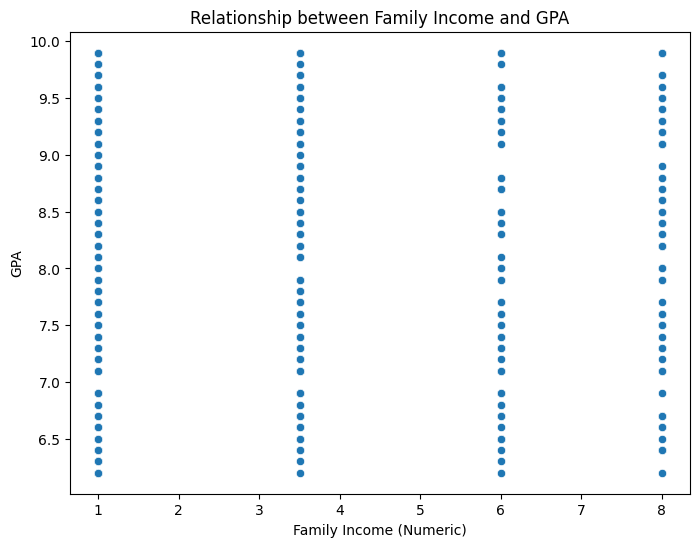

Correlation between Family Income and GPA: 0.01574077700967218


In [45]:
#can we identify any relationship between  family income and GPA?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Family Income' to numeric using the mapping you created earlier
income_mapping = {
    "0-2 Lakh": 1,  # Taking midpoints of the ranges
    "2-5 Lakh": 3.5,
    "5-7 Lakh": 6,
    "7 Lakh+": 8

}
df['Family Income Numeric'] = df['Family Income'].map(income_mapping)

# Create a scatter plot to visualize the relationship using the numeric column
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Family Income Numeric', y='CGPA', data=df)  # Changed x to 'Family Income Numeric'
plt.title('Relationship between Family Income and GPA')
plt.xlabel('Family Income (Numeric)')
plt.ylabel('GPA')
plt.show()

# Calculate the correlation coefficient using the numeric column
correlation = df['Family Income Numeric'].corr(df['CGPA'])  # Changed to 'Family Income Numeric'
print(f"Correlation between Family Income and GPA: {correlation}")
